In [27]:
import os
import glob
from natsort import natsorted
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data_dir = "/work/vajira/DATA/sinGAN_polyps/synthetic_polyps_and_masks_10k"

In [41]:
paths = glob.glob(data_dir + "/chk_id_100_*_mask.png")

In [42]:
paths

['/work/vajira/DATA/sinGAN_polyps/synthetic_polyps_and_masks_10k/chk_id_100_gen_scale_0_9_mask.png',
 '/work/vajira/DATA/sinGAN_polyps/synthetic_polyps_and_masks_10k/chk_id_100_gen_scale_0_7_mask.png',
 '/work/vajira/DATA/sinGAN_polyps/synthetic_polyps_and_masks_10k/chk_id_100_gen_scale_0_6_mask.png',
 '/work/vajira/DATA/sinGAN_polyps/synthetic_polyps_and_masks_10k/chk_id_100_gen_scale_0_3_mask.png',
 '/work/vajira/DATA/sinGAN_polyps/synthetic_polyps_and_masks_10k/chk_id_100_gen_scale_0_2_mask.png',
 '/work/vajira/DATA/sinGAN_polyps/synthetic_polyps_and_masks_10k/chk_id_100_gen_scale_0_8_mask.png',
 '/work/vajira/DATA/sinGAN_polyps/synthetic_polyps_and_masks_10k/chk_id_100_gen_scale_0_4_mask.png',
 '/work/vajira/DATA/sinGAN_polyps/synthetic_polyps_and_masks_10k/chk_id_100_gen_scale_0_1_mask.png',
 '/work/vajira/DATA/sinGAN_polyps/synthetic_polyps_and_masks_10k/chk_id_100_gen_scale_0_5_mask.png',
 '/work/vajira/DATA/sinGAN_polyps/synthetic_polyps_and_masks_10k/chk_id_100_gen_scale_0_0_m

In [43]:
sorted_paths = natsorted(paths)

In [44]:
test_img = Image.open(sorted_paths[0])

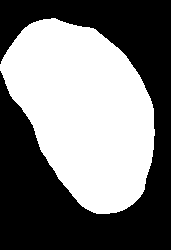

In [45]:
test_img

In [46]:
one_channel = np.array(test_img)[:,:,0]

In [47]:
one_channel.shape

(250, 171)

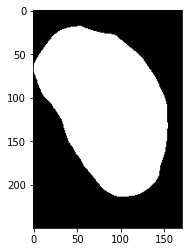

In [48]:
plt.imshow(one_channel, cmap="gray")

In [ ]:
def stack_masks(img_id):
    